# Basics of cluster analysis

## Import the relevant libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

In [3]:
# Load the country clusters data
data = pd.read_csv("3.01.+Country+clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Plot the data

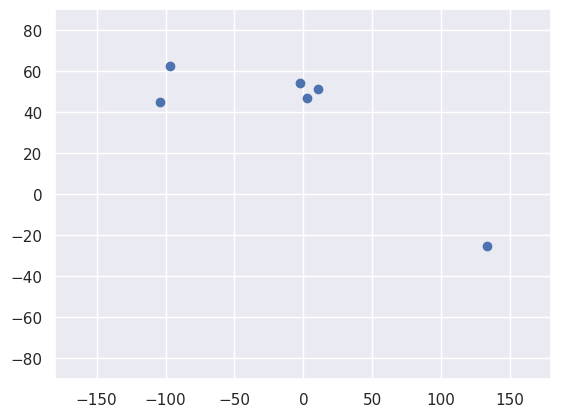

In [4]:
# Use the simplest code possible to create a scatter plot using the longitude and latitude
# Note tha in order to reach a result resembling the world map, we must use the longitude as y, and latitude as x
plt.scatter(data["Longitude"], data["Latitude"])
# Set limits of the axes, again to resemble thw world map
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

## Select the features

In [5]:
# iloc is a method used to "slide" data
x = data.iloc[:, 1:3]
# Mean: slect all row, and column 1,2

In [6]:
# Check if we worked correctly
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

In [7]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(3)

In [8]:
# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(x)

/home/dang/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

## Clustering results

In [9]:
# Create a variable which will contain the predicted clusters for each observation
indentified_clusters = kmeans.fit_predict(x)
# Check the result
indentified_clusters

/home/dang/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 1, 1, 1, 0], dtype=int32)

In [10]:
# Create a copy of the data
data_with_cluster = data.copy()
# Create a new series, containing the identified cluster for each observation
data_with_cluster["Cluster"] = indentified_clusters
# Check the result
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


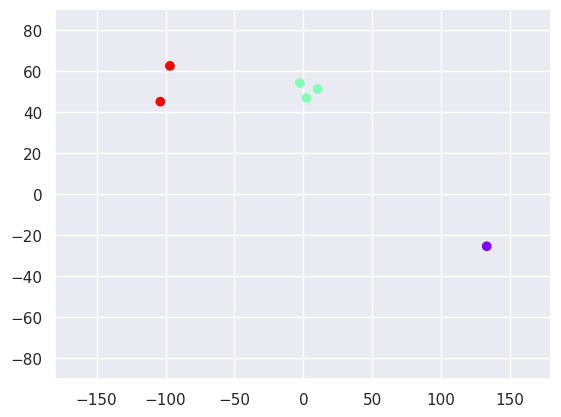

In [15]:
plt.scatter(data_with_cluster["Longitude"], data_with_cluster["Latitude"], c=data_with_cluster["Cluster"], cmap="rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()